In [60]:
using CSV
using DataFrames
using Glob
using Statistics

In [61]:
using Gadfly
import Cairo, Fontconfig

In [62]:
ENV["COLUMNS"] = 1000;

In [63]:
defaultfont = "CMU Serif";
fontstyles = (
    key_title_font = defaultfont,
    key_label_font = defaultfont,
    minor_label_font = defaultfont,
    major_label_font = defaultfont,
    key_title_font_size = 14px,
    key_label_font_size = 12px,
    minor_label_font_size = 14px,
    major_label_font_size = 16px,
);

In [64]:
pointstyles = (
    highlight_width=0px,
);

In [65]:
fns = glob("*.csv", "../results/experiment_4_6a/real/");
results_list = [DataFrame(CSV.File(fn)) for fn in fns];
results_real = vcat(results_list...);

In [66]:
fns = glob("*.csv", "../results/experiment_4_6a/er/");
results_list = [DataFrame(CSV.File(fn)) for fn in fns];
results_er = vcat(results_list...);

In [67]:
mean(x) = sum(x) / length(x);
stderror(x) = std(x) / sqrt(length(x));

In [68]:
function avg_results(df)
    return combine(groupby(df, :m), [
        :alignment_strength_1 => mean => :alignment_strength_mean,
        :match_ratio => mean => :match_ratio_mean,
        :alignment_strength_1 => stderror => :alignment_strength_stderror,
        :match_ratio => stderror => :match_ratio_stderror,
    ]);
end;

In [69]:
results_real_avg = avg_results(results_real);
results_er_avg = avg_results(results_er);

In [70]:
figurespath = "./figures_46a/pdf/"
if !isdir(figurespath) mkpath(figurespath) end;

In [71]:
# colors = Scale.default_discrete_colors(5)[[1,3,4,5]]
colors = [colorant"deepskyblue", colorant"darkblue", colorant"palegreen1", colorant"darkgreen"]

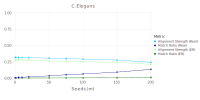

In [72]:
plt = plot(
    layer(
        results_real_avg,
        x=:m,
        y=:alignment_strength_mean,
        Geom.point, Geom.line,
        style(default_color=colors[1]),
    ),
    layer(
        results_real_avg,
        x=:m,
        y=:match_ratio_mean,
        Geom.point, Geom.line,
        style(default_color=colors[2]),
    ),
    layer(
        results_er_avg,
        x=:m,
        y=:alignment_strength_mean,
        Geom.point, Geom.line,
        style(default_color=colors[3]),
    ),
    layer(
        results_er_avg,
        x=:m,
        y=:match_ratio_mean,
        Geom.point, Geom.line,
        style(default_color=colors[4]),
    ),
    Guide.xlabel("Seeds (m)"),
    Guide.ylabel(""),
    Guide.title("C. Elegans"),
    Coord.cartesian(ymin=0, ymax=1),
    Guide.manual_color_key("Metric", ["Alignment Strength (Real)", "Match Ratio (Real)", "Alignment Strength (ER)", "Match Ratio (ER)"], colors),
    Guide.yticks(ticks=0:0.25:1),
    style(
        ;fontstyles...,
        pointstyles...,
    ),
)

plt |> PDF(joinpath(figurespath, "exp46_elegans.pdf"), 20cm, 10cm)
plt |> SVG(20cm, 10cm)

In [73]:
results_real_avg |> CSV.write("figures_46a/results/exp46_celegans_means.csv")

"figures_46a/results/exp46_celegans_means.csv"